In [1]:
import torch as th
from mip_model import IntegratedFourierFeatures
from model_interpolation_architecture import FourierFeatures
import matplotlib.pyplot as plt

# th.manual_seed(0)

pixel_width = 0.1

t = th.rand(10).sort()[0]*2*th.pi
t_start = t[:-1].view(-1, 1)
t_end = t[1:].view(-1, 1)



orig = th.randn(1,3)*3 + 5
dir = th.randn(1,3)
dir = dir / th.sum(dir**2, dim=1, keepdim=True)**0.5
dir = dir.repeat(9, 1)


pos = orig + dir * t_start

ipe_encoder = IntegratedFourierFeatures(4, 1.)
pe_encoder = FourierFeatures(4, 1.)

ipe = ipe_encoder(pos, dir, t_start, t_end, pixel_width)
pe = pe_encoder(pos)



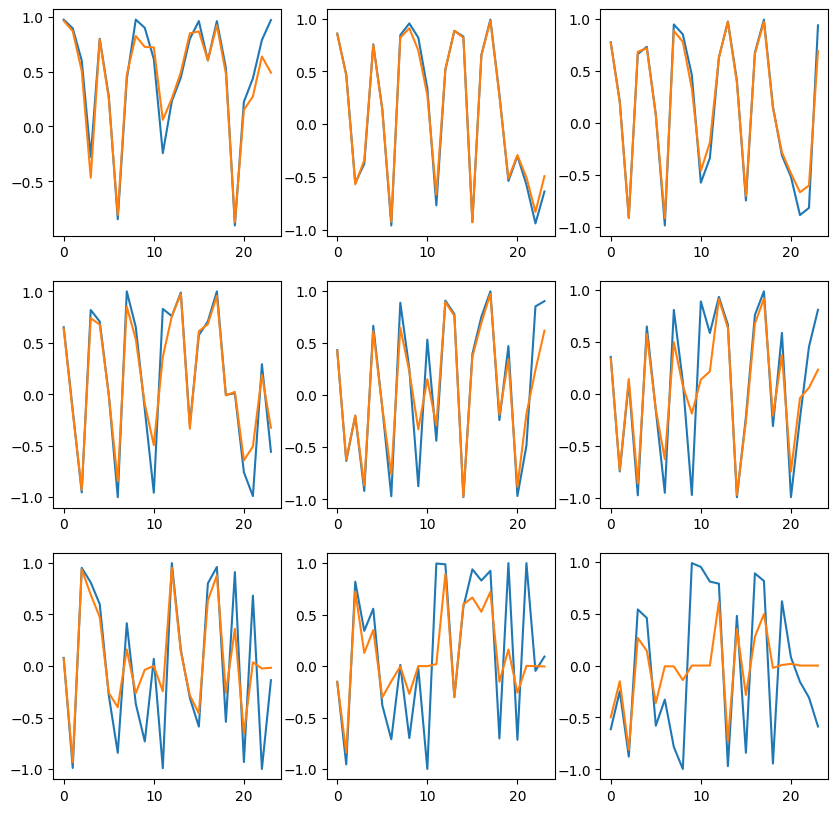

In [2]:
idx = 1
fig = plt.figure(figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax = fig.add_subplot(3, 3, idx)
        ax.plot(pe[idx-1].detach().numpy(), label='pe')
        ax.plot(ipe[idx-1].detach().numpy(), label='ipe')
        idx += 1

plt.show()

In [3]:
import os
from mip_data_module import MipImagePoseDataset


class Dummy:
    def __init__(self):
        self.image_width = 800
        self.image_height = 800
        self.scene_path = "../data/lego_subset"
        self.space_transform = None

purpose = "val"

self = Dummy()

dataset = MipImagePoseDataset(
    image_width=self.image_width,
    image_height=self.image_height,
    images_path=os.path.join(self.scene_path, purpose).replace("\\", "/"),
    pose_path=os.path.join(self.scene_path, f"transforms_{purpose}.json").replace("\\", "/"),
    space_transform=self.space_transform
)


In [ ]:
from torch.utils.data import DataLoader
dl = DataLoader(dataset, batch_size=10, shuffle=True, num_workers=4)

NameError: name 'ds' is not defined